In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, fbeta_score
import optuna
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
from imblearn.over_sampling import SMOTE

In [84]:
random_state = 33 
test_size = 0.20 
n_trials = 100 #количество итераций optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) #optuna "тихий" режим
warnings.filterwarnings("ignore") #optuna "тихий" режим

In [85]:
df = pd.read_csv('df.csv')
X = df.drop(['ij_1'], axis=1)
y = df['ij_1']

In [86]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [87]:
scaler = StandardScaler()

# Logistic Regression

In [88]:
skf = StratifiedKFold(random_state=random_state, n_splits=5, shuffle=True)
oversample = SMOTE(random_state=random_state)

In [89]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=10000, random_state=random_state))
    ])

In [90]:
#None
f1_scores = []
for i, (train_index, valid_index) in enumerate(skf.split(X_train_valid, y_train_valid)):
    X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_valid.iloc[train_index], y_train_valid.iloc[train_index])
    pipeline.fit(X_train_oversampled, y_train_oversampled)
    pred_prob = pipeline.predict_proba(X_train_valid.iloc[valid_index])[:, 1]
    f1_scores.append(f1_score(y_train_valid.iloc[valid_index], pred_prob > 0.5))
X_train_oversampled, y_train_oversampled = X_train_valid, y_train_valid
pipeline.fit(X_train_oversampled, y_train_oversampled)
pred_prob = pipeline.predict(X_test)

f1_valid = np.mean(f1_scores)
f1_test = f1_score(y_test, pred_prob)

In [91]:
f1_valid

0.3197860962566845

In [92]:
f1_test

0.33333333333333337

In [93]:
f1_scores

[0.5, 0.0, 0.5, 0.36363636363636365, 0.23529411764705882]

In [74]:
background_test = shap.maskers.Independent(X_test, max_samples=3000)
background_test.shape

(233, 62)

In [75]:
explainer = shap.Explainer(pipeline['logreg'], background_test,feature_names=list(X_test.columns), random_state=random_state)
shap_values_test = explainer(pipeline['scaler'].transform(X_test))

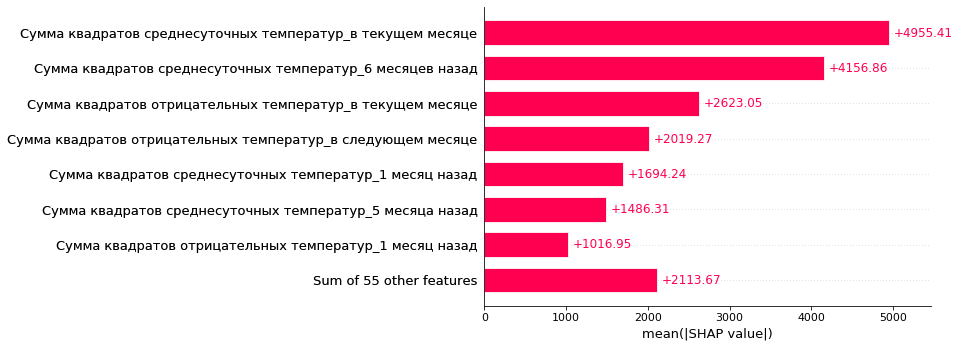

In [76]:
shap.plots.bar(shap_values_test, max_display=8)

# KNN


In [94]:
skf = StratifiedKFold(random_state=random_state, n_splits=5, shuffle=True)

In [95]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', KNeighborsClassifier())
    ])

In [96]:
#None
f1_scores = []
for i, (train_index, valid_index) in enumerate(skf.split(X_train_valid, y_train_valid)):
    X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_valid.iloc[train_index], y_train_valid.iloc[train_index])
    pipeline.fit(X_train_oversampled, y_train_oversampled)
    pred_prob = pipeline.predict_proba(X_train_valid.iloc[valid_index])[:, 1]
    f1_scores.append(f1_score(y_train_valid.iloc[valid_index], pred_prob > 0.5))
X_train_oversampled, y_train_oversampled = X_train_valid, y_train_valid
pipeline.fit(X_train_oversampled, y_train_oversampled)
pred_prob = pipeline.predict(X_test)

f1_valid = np.mean(f1_scores)
f1_test = f1_score(y_test, pred_prob)

In [97]:
f1_valid

0.29872966730551875

In [98]:
f1_test

0.0

# Catboost

In [99]:
pipeline = CatBoostClassifier(random_state=random_state)

In [100]:
#None
f1_scores = []
for i, (train_index, valid_index) in enumerate(skf.split(X_train_valid, y_train_valid)):
    X_train_oversampled, y_train_oversampled = X_train_valid.iloc[train_index], y_train_valid.iloc[train_index]
    pipeline.fit(X_train_oversampled, y_train_oversampled, verbose=0)
    pred_prob = pipeline.predict_proba(X_train_valid.iloc[valid_index])[:, 1]
    f1_scores.append(f1_score(y_train_valid.iloc[valid_index], pred_prob > 0.5))
X_train_oversampled, y_train_oversampled = X_train_valid, y_train_valid
pipeline.fit(X_train_oversampled, y_train_oversampled)
pred_prob = pipeline.predict(X_test)

f1_valid = np.mean(f1_scores)
f1_test = f1_score(y_test, pred_prob)

Learning rate set to 0.009993
0:	learn: 0.6733548	total: 4.6ms	remaining: 4.6s
1:	learn: 0.6540276	total: 9.18ms	remaining: 4.58s
2:	learn: 0.6335037	total: 13.8ms	remaining: 4.59s
3:	learn: 0.6123598	total: 18.3ms	remaining: 4.55s
4:	learn: 0.5946450	total: 22.9ms	remaining: 4.55s
5:	learn: 0.5775870	total: 27.4ms	remaining: 4.54s
6:	learn: 0.5593466	total: 31.8ms	remaining: 4.52s
7:	learn: 0.5426410	total: 36.3ms	remaining: 4.5s
8:	learn: 0.5278447	total: 40.9ms	remaining: 4.5s
9:	learn: 0.5101834	total: 45.3ms	remaining: 4.48s
10:	learn: 0.4969945	total: 49.8ms	remaining: 4.47s
11:	learn: 0.4818578	total: 54.3ms	remaining: 4.47s
12:	learn: 0.4675061	total: 58.7ms	remaining: 4.46s
13:	learn: 0.4555283	total: 63.2ms	remaining: 4.45s
14:	learn: 0.4444626	total: 67.5ms	remaining: 4.43s
15:	learn: 0.4325035	total: 72ms	remaining: 4.43s
16:	learn: 0.4192337	total: 76.5ms	remaining: 4.42s
17:	learn: 0.4058209	total: 81ms	remaining: 4.42s
18:	learn: 0.3939859	total: 85.4ms	remaining: 4.41s


In [101]:
f1_valid

0.0

In [103]:
f1_scores

[0.0, 0.0, 0.0, 0.0, 0.0]

In [102]:
f1_test

0.0

# MLP

In [104]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', MLPClassifier(random_state=random_state))
    ])

In [105]:
#None
f1_scores = []
for i, (train_index, valid_index) in enumerate(skf.split(X_train_valid, y_train_valid)):
    X_train_oversampled, y_train_oversampled = X_train_valid.iloc[train_index], y_train_valid.iloc[train_index]
    pipeline.fit(X_train_oversampled, y_train_oversampled)
    pred_prob = pipeline.predict_proba(X_train_valid.iloc[valid_index])[:, 1]
    f1_scores.append(f1_score(y_train_valid.iloc[valid_index], pred_prob > 0.5))
X_train_oversampled, y_train_oversampled = X_train_valid, y_train_valid
pipeline.fit(X_train_oversampled, y_train_oversampled)
pred_prob = pipeline.predict(X_test)

f1_valid = np.mean(f1_scores)
f1_test = f1_score(y_test, pred_prob)

In [106]:
f1_valid

0.18

In [107]:
f1_test

0.5714285714285715